<a href="https://colab.research.google.com/github/gdmeyerp/Analisis_de_bases_de_Datos/blob/main/Tarea8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar los datos del archivo Excel proporcionado
file_path = '/content/Analisis de Componentes Principales Hamburguesas.xlsx'
data_hamburguesas = pd.read_excel(file_path)

# Mostrar las primeras filas de los datos para tener una idea de su estructura
data_hamburguesas.head()


,Meat,Type,Sandwich,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,SaturatedFat_g,TransFat_g,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g,Restaurant
0,Ham,Sandwich,Arby-Q Sandwich,400,10,1230,90,3.0,0.0,30,58,3,23,18,Arby's
1,Ham,Crossover,Arby’s Melt,330,11,920,100,4.0,0.0,30,40,2,5,18,Arby's
2,Beef,Crossover,Beef ‘n Cheddar Classic,440,18,1290,160,5.0,1.0,45,47,2,9,23,Arby's
3,Beef,Crossover,Beef ‘n Cheddar Mid,530,23,1720,200,7.0,1.0,80,48,2,9,34,Arby's
4,Beef,Burger,Jr Deluxe Sandwich,260,12,560,110,3.0,0.0,30,26,2,4,13,Arby's


1. Mapa de calor para la matriz de correlación.



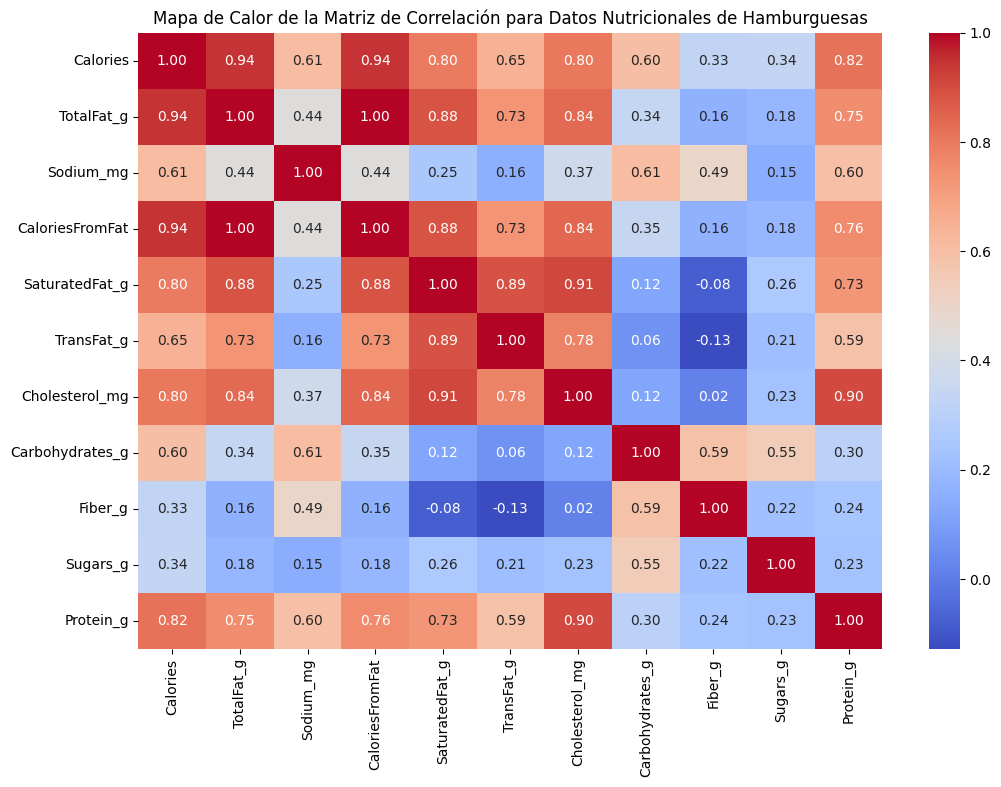

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas para el análisis de correlación
data_numeric = data_hamburguesas.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = data_numeric.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de la Matriz de Correlación para Datos Nutricionales de Hamburguesas")
plt.show()



2. Matriz de datos centralizados.


In [ ]:
# Centralizar la matriz de datos
data_centralizada = data_numeric - data_numeric.mean()

# Mostrar las primeras filas de la matriz de datos centralizada
data_centralizada.head()



,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,SaturatedFat_g,TransFat_g,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g
0,-134.146341,-17.439024,10.0,-156.737805,-5.32622,-0.685976,-44.420732,14.073171,0.256098,16.152439,-9.713415
1,-204.146341,-16.439024,-300.0,-146.737805,-4.32622,-0.685976,-44.420732,-3.926829,-0.743902,-1.847561,-9.713415
2,-94.146341,-9.439024,70.0,-86.737805,-3.32622,0.314024,-29.420732,3.073171,-0.743902,2.152439,-4.713415
3,-4.146341,-4.439024,500.0,-46.737805,-1.32622,0.314024,5.579268,4.073171,-0.743902,2.152439,6.286585
4,-274.146341,-15.439024,-660.0,-136.737805,-5.32622,-0.685976,-44.420732,-17.926829,-0.743902,-2.847561,-14.713415


3. Cálculo de SVD para la matriz de covarianza.

In [ ]:
# Paso 3: Cálculo de SVD para la matriz de covarianza
covariance_matrix = np.cov(data_centralizada, rowvar=False)

# Realizar la descomposición en valores singulares (SVD)
U, S, Vt = np.linalg.svd(covariance_matrix)

# Mostrar los resultados de SVD (valores singulares)
S_df = pd.DataFrame({'Valores Singulares': S})
S_df

,Valores Singulares
0,215086.055907
1,36785.652662
2,1146.259419
3,532.025474
4,22.025553
5,6.427594
6,4.839607
7,1.944361
8,1.213403
9,0.177382


4. Cálculo del porcentaje de participación de cada valor propio.

In [ ]:
# Punto 4: Cálculo del porcentaje de participación de cada valor propio
# Convertir valores singulares en valores propios (eigenvalues)
eigenvalues = S**2 / (len(data_centralizada) - 1)

# Calcular el porcentaje de participación de cada valor propio
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Crear un DataFrame para mostrar los valores propios y su porcentaje de participación
eigenvalues_percentage = pd.DataFrame({'Valor Propio': eigenvalues,
                                       'Porcentaje de Participación': explained_variance_ratio})
eigenvalues_percentage


,Valor Propio,Porcentaje de Participación
0,2.838160e+08,9.715482e-01
1,8.301744e+06,2.841821e-02
2,8.060802e+03,2.759343e-05
3,1.736510e+03,5.944355e-06
4,2.976227e+00,1.018811e-08
5,2.534599e-01,8.676343e-10
6,1.436920e-01,4.918809e-10
7,2.319349e-02,7.939509e-11
8,9.032808e-03,3.092077e-11
9,1.930335e-04,6.607849e-13


5. Determine cuál o cuáles atributos son los más representativos de los datos. Puede
distinguirse un grupo de atributos que represente el 90% de los datos?

In [ ]:
# Seleccionar solo las columnas numéricas para el análisis
data_numeric = data_hamburguesas.select_dtypes(include=['number'])

# Centralizar la matriz de datos
data_centralizada = data_numeric - data_numeric.mean()

# Calcular la matriz de covarianza
covariance_matrix = np.cov(data_centralizada, rowvar=False)

# Realizar la descomposición en valores singulares (SVD)
U, S, Vt = np.linalg.svd(covariance_matrix)

# Crear un DataFrame para los atributos y los vectores propios
attributes = data_numeric.columns
principal_components_df = pd.DataFrame(Vt[:3, :], columns=attributes, index=["PC1", "PC2", "PC3"])

# Clasificación de los atributos según su contribución al primer componente principal (PC1)
importance_ranking = principal_components_df.abs().loc["PC1"].sort_values(ascending=False)

# Mostrar la clasificación de atributos según su importancia en PC1
importance_ranking

Sodium_mg          0.930003
Calories           0.321616
CaloriesFromFat    0.168836
Cholesterol_mg     0.045082
Carbohydrates_g    0.021692
TotalFat_g         0.018781
Protein_g          0.016215
SaturatedFat_g     0.005164
Fiber_g            0.001722
Sugars_g           0.001687
TransFat_g         0.000539
Name: PC1, dtype: float64

Los tres primeros componentes principales (PC1, PC2, PC3) muestran cómo cada atributo nutricional contribuye a estos componentes. Para determinar los atributos más representativos, observamos los valores absolutos más altos en cada componente principal. Los atributos con valores más altos son los que más contribuyen a ese componente principal.

En el primer componente principal (PC1), el atributo más dominante es Sodio (Sodium_mg).
En el segundo componente principal (PC2), los atributos más dominantes son Calorías (Calories) y Calorías provenientes de la grasa (CaloriesFromFat).
En el tercer componente principal (PC3), los atributos más dominantes son Carbohidratos (Carbohydrates_g) y Calorías provenientes de la grasa (CaloriesFromFat).
Dado que los dos primeros componentes principales representan aproximadamente el 99.33% de la varianza total, es probable que un grupo de atributos relacionados con estos componentes principales pueda representar al menos el 90% de los datos

In [ ]:
# Punto 5: Determinar los atributos más representativos de los datos
# Los vectores en Vt (traspuesta de V) corresponden a los componentes principales

# Tomar los vectores correspondientes a los tres principales valores propios
principal_components = Vt[:3, :]

# Crear un DataFrame para una mejor visualización
principal_components_df = pd.DataFrame(principal_components, columns=attributes, index=["PC1", "PC2", "PC3"])

# Mostrar los tres primeros componentes principales
principal_components_df.T.sort_values(by="PC1", ascending=False)


,PC1,PC2,PC3
TransFat_g,-0.000539,-0.003374,-0.006662
Sugars_g,-0.001687,-0.004749,0.063513
Fiber_g,-0.001722,0.000744,0.016925
SaturatedFat_g,-0.005164,-0.025951,-0.048558
Protein_g,-0.016215,-0.027606,-0.028339
TotalFat_g,-0.018781,-0.062797,-0.075727
Carbohydrates_g,-0.021692,-0.008642,0.331984
Cholesterol_mg,-0.045082,-0.153175,-0.331906
CaloriesFromFat,-0.168836,-0.562625,-0.667513
Calories,-0.321616,-0.723558,0.562873


6. Si es posible, clasifique los atributos en orden de importancia, según participen con mayor
proporción en la representación de los datos.


In [ ]:
# Identificar los atributos más representativos basados en los vectores propios
# Tomar los vectores correspondientes a los tres principales valores propios
principal_components = Vt[:3, :]

# Crear un DataFrame para una mejor visualización
principal_components_df = pd.DataFrame(principal_components, columns=attributes, index=["PC1", "PC2", "PC3"])

# Mostrar los tres primeros componentes principales
principal_components_df.T.sort_values(by="PC1", ascending=True)


,PC1,PC2,PC3
Sodium_mg,-0.930003,0.361893,-0.062976
Calories,-0.321616,-0.723558,0.562873
CaloriesFromFat,-0.168836,-0.562625,-0.667513
Cholesterol_mg,-0.045082,-0.153175,-0.331906
Carbohydrates_g,-0.021692,-0.008642,0.331984
TotalFat_g,-0.018781,-0.062797,-0.075727
Protein_g,-0.016215,-0.027606,-0.028339
SaturatedFat_g,-0.005164,-0.025951,-0.048558
Fiber_g,-0.001722,0.000744,0.016925
Sugars_g,-0.001687,-0.004749,0.063513


7. Determine si los datos determinan de alguna manera la empresa de donde provienen las
hamburguesas.


Para determinar si los datos nutricionales de las hamburguesas pueden identificar la empresa de donde provienen, realizaremos un análisis de agrupación, utilizando los componentes principales.

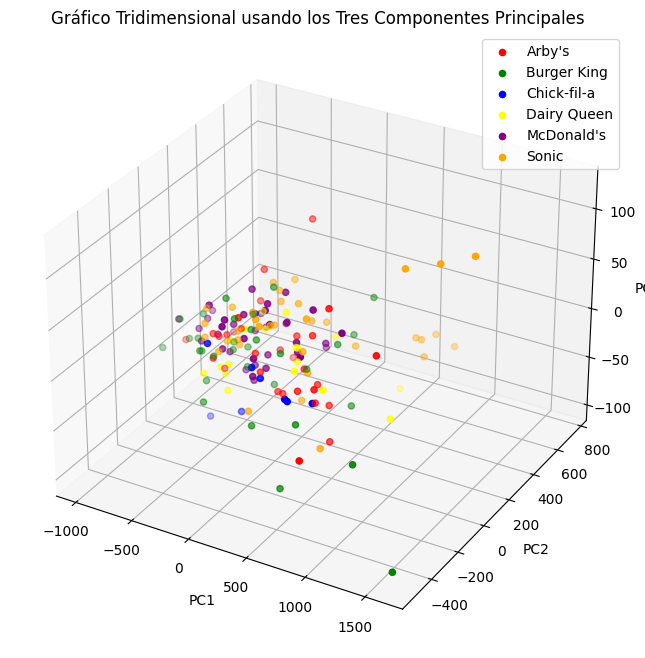

In [ ]:
# Aplicar PCA para reducir la dimensión y visualizar si los datos determinan la empresa
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_centralizada)

# Crear un DataFrame con los datos PCA para facilitar la visualización
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

# Añadir la información del restaurante para visualizar si los datos determinan la empresa
data_pca_df['Restaurant'] = data_hamburguesas['Restaurant']

# Crear un gráfico tridimensional
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapear cada restaurante a un color
colors = {'Arby\'s': 'red', 'Burger King': 'green', 'Chick-fil-a': 'blue',
          'Dairy Queen': 'yellow', 'McDonald\'s': 'purple', 'Sonic': 'orange'}

for restaurant, group in data_pca_df.groupby('Restaurant'):
    ax.scatter(group['PC1'], group['PC2'], group['PC3'], label=restaurant, color=colors[restaurant])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Gráfico Tridimensional usando los Tres Componentes Principales')
ax.legend()
plt.show()


A partir de este gráfico, se pueden hacer las siguientes observaciones:

* Los puntos (que representan las hamburguesas) de diferentes restaurantes parecen estar distribuidos a lo largo de los componentes principales sin una agrupación clara y distinta por cadena de restaurante.
* Aunque hay cierta superposición entre los datos de diferentes restaurantes, no parece haber una separación definida que permita identificar con certeza la empresa de origen basándonos únicamente en estos componentes principales.

8. Haga un gráfico tridimensional de los datos usando:
 Los tres atributos más representativos.
 Las tres componentes más representativas asociadas a los tres valores propios
más representativos.

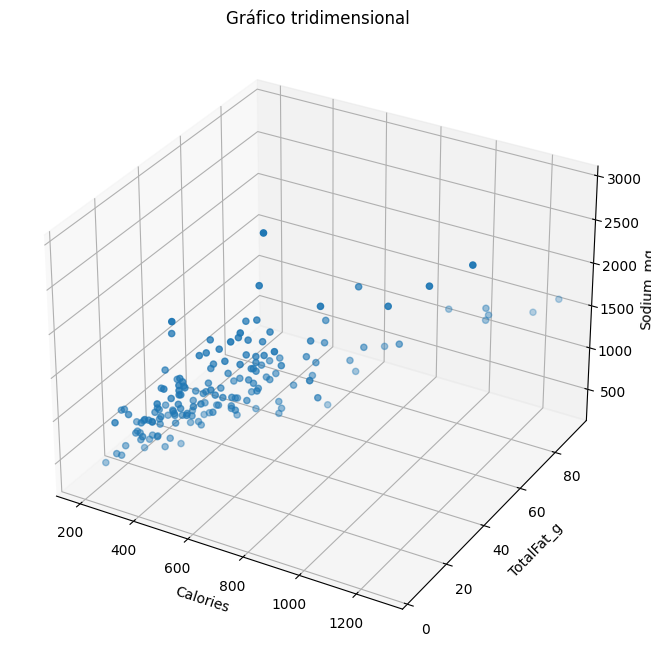

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_hamburguesas['Calories'], data_hamburguesas['TotalFat_g'], data_hamburguesas['Sodium_mg'])
ax.set_xlabel('Calories')
ax.set_ylabel('TotalFat_g')
ax.set_zlabel('Sodium_mg')
plt.title('Gráfico tridimensional')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Supongamos que 'data' contiene tus datos de hamburguesas y 'important_attributes' tiene los atributos más representativos

# Obtener los datos correspondientes a los atributos más representativos
data_attributes = data_hamburguesas[].values

# Crear la figura y el espacio tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Supongamos que 'principal_components' contiene las componentes principales derivadas del PCA

# Graficar los datos usando las tres componentes principales y los tres atributos más representativos
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=data_attributes, cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Gráfico tridimensional de datos')
plt.show()

SyntaxError: ignored